# En este colab se busca definir las caracteristicas, procedimientos y salida final de la capa de entradas para una red neuronal de reconocimiento de audio general

## Configuración inicial

In [1]:
"""
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Facultad DOCS/Proyecto EXPO 2023/Proyecto Voz/Datasets'
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n%cd '/content/drive/MyDrive/Facultad DOCS/Proyecto EXPO 2023/Proyecto Voz/Datasets'\n"

In [2]:
import pandas as pd
import numpy as np
import librosa #Procesamiento digital de audio
import seaborn as sns
import matplotlib.pyplot as plt
import spectrogram

In [3]:
%ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: FAAB-0167

 Directorio de c:\Users\Augus\OneDrive\Desktop\Facultad\EXPO2023\Audio

18/04/2023  00:41    <DIR>          .
18/04/2023  00:41    <DIR>          ..
11/04/2023  00:43    <DIR>          __pycache__
18/04/2023  01:28    <DIR>          database
20/04/2023  18:45           426.363 Formato de entrada_local.ipynb
11/04/2023  01:02    <DIR>          modelos de redes neuronales
04/04/2023  00:59             2.516 spectrogram.py
               2 archivos        428.879 bytes
               5 dirs  46.437.785.600 bytes libres


In [4]:
%cd ./database

c:\Users\Augus\OneDrive\Desktop\Facultad\EXPO2023\Audio\database


### Constantes

Las constantes se definen en función a los requerimientos del modelo de red neuronal profunda y a la aplicabilidad de la misma

- fs: frecuencia de muestreo del audio
- windows_t: cantidad de particiones contables en el tiempo
- windows_f: cantidad de particiones contables en el espectro

estas útlimas dos constantes nos permiten crear la imagen la cual será la capa de entrada X de nuestra red neuronal 

Es fundamental que la frecuencia de muestreo (fs) sea mayor que la frecuencia que quiero escuchar para asi poder tener acceso a ella. Lo ideal es que sea aproximadamente el doble a la frecuencia de corte del ancho de banda para una mejor respuesta a la hora de construir el espectrograma 

audios largos = calculo potencialmente alto

In [5]:
fs=10000
windows_t = 40
windows_f = 25

In [6]:
data_URL = './cat_124.wav'

## Muestreo

 ### señal x[n]

#### Muestreamos usando librosa e imprimios la cantidad de puntos extradiso del audio

In [7]:
x, fs = librosa.load(data_URL, sr=fs) 
#Si no se especifica sr=None, entonces el audio se cambia de sampling a 22050
# automaticamente carga el audio como un float
print('Tamaño del archivo de audio = {x.shape}, Frecuencia de Muestreo = {fs} y tipo de dato = {x.dtype}')

Tamaño del archivo de audio = {x.shape}, Frecuencia de Muestreo = {fs} y tipo de dato = {x.dtype}


Text(0.5, 1.0, '$x[n]$')

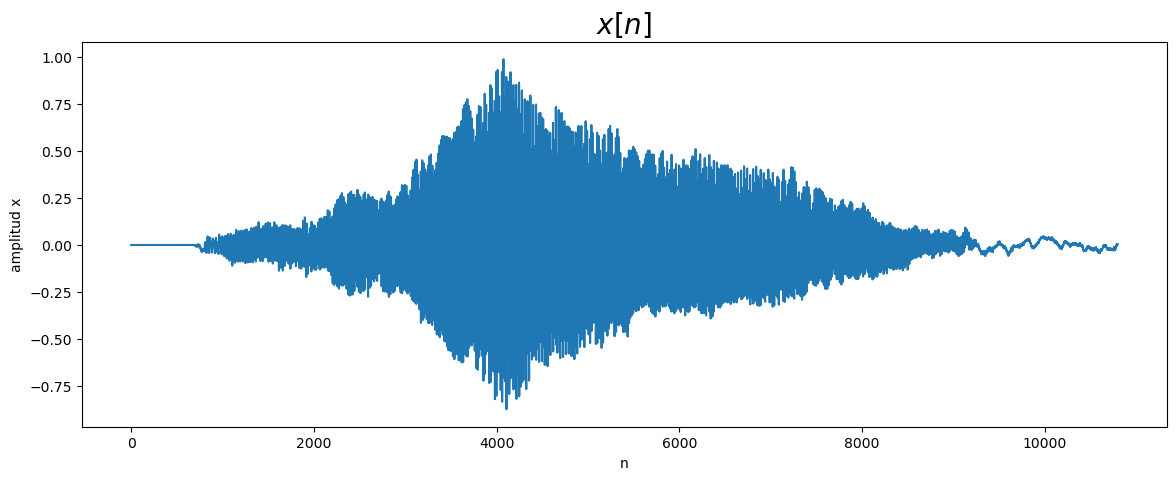

In [8]:
plt.figure(figsize=(14, 5))

plt.plot(x)
plt.xlabel('n')
plt.ylabel('amplitud x')
plt.title(r'$x[n]$', size=20)

Imprimos la señal original extrayendo los valores de corte generado en los extremos (ocurre cuando se pasa de un instante 0 a uno diferente de 0 rapidamente)

Text(0.5, 1.0, '$x[n]$')

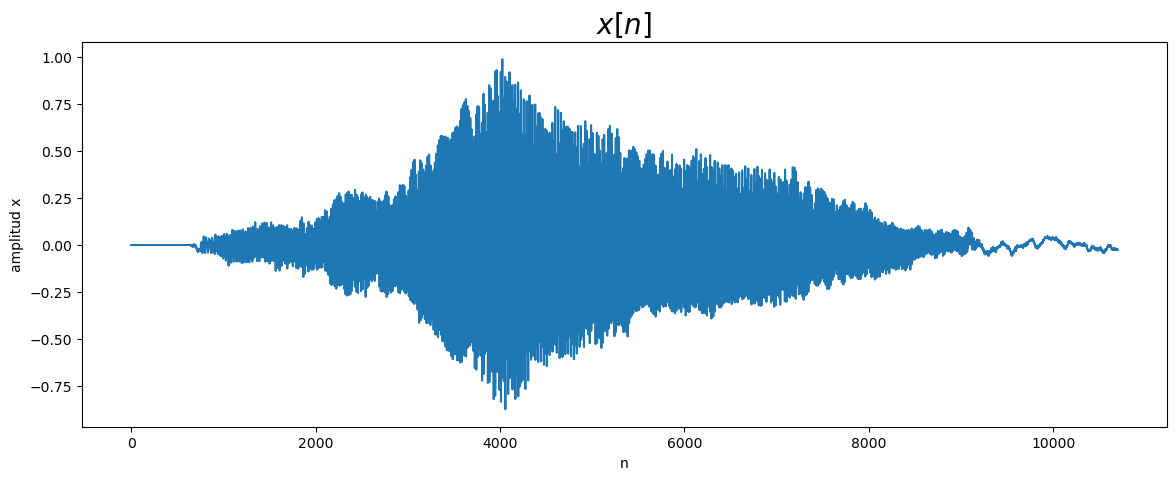

In [9]:
#Saco los valores iniciales
x = x[50:-50]

plt.figure(figsize=(14, 5))

plt.plot(x)
plt.xlabel('n')
plt.ylabel('amplitud x')
plt.title(r'$x[n]$', size=20)

##### Probamos partición de la señal en ventanas 

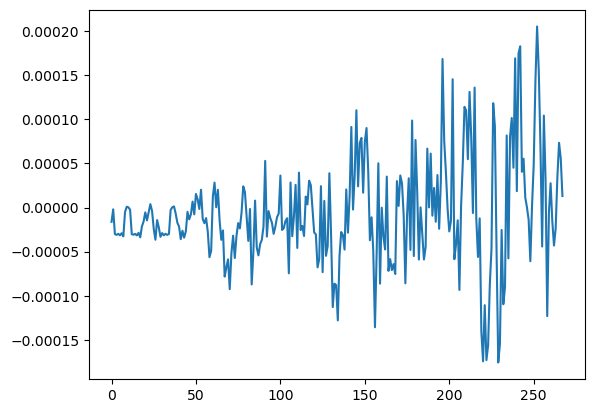

In [10]:
ventana_1 = x[(len(x)//windows_t):(len(x)*2//windows_t)]
plt.plot(ventana_1)

## Construicción del espectrograma

**Calculamos TDF (los puntos en las celdas)**

(25, 40)


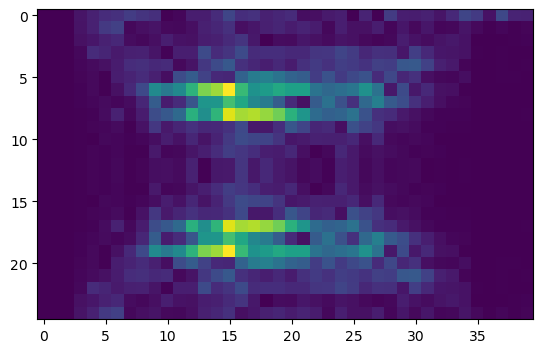

In [11]:
# Alternativa a calcular la fft en vez de hacerlo punto por punto
spectrum = np.zeros(shape=(windows_f,windows_t))

for window in range(0,windows_t):
    #np.fft.fft implementa el algoritmo fast tdf
    spec_fft = np.fft.fft(x[((len(x)*window)//windows_t) : ((len(x)*(window + 1))//windows_t)],n=windows_f) #Cantidad de frecuencias
    #spec_fft = spec_fft[:len(spec_fft)//2] Aprovechando la simetria hermítica pero puedo configurarlo en el parámetro n del fft
    spectrum[:,window] = np.abs(spec_fft[0:windows_f])

print(spectrum.shape)
plt.imshow(spectrum)

Genero un dataset que me sirve para realizar mediciones estadisticas y ver los datos de una mejor manera aplicando ordenes y filtros en las filas

In [12]:
my_df = { 'window: '+ str(window + 1) : spectrum[:,window] for window in range(0, windows_t) }
df = pd.DataFrame(my_df)
df

,window: 1,window: 2,window: 3,window: 4,window: 5,window: 6,window: 7,window: 8,window: 9,window: 10,...,window: 31,window: 32,window: 33,window: 34,window: 35,window: 36,window: 37,window: 38,window: 39,window: 40
0,1.516310e-08,0.000457,0.001042,0.222229,0.370329,0.507516,0.558371,0.714606,0.613830,0.547284,...,0.320894,0.377377,0.234761,0.460119,0.853596,0.681127,0.199130,0.882221,0.400561,0.394017
1,8.939192e-09,0.000054,0.000498,0.206387,0.371652,0.680507,0.774107,0.093243,0.169337,0.206583,...,0.108565,0.237589,0.075224,0.087759,0.236581,0.099024,0.025163,0.070282,0.016942,0.049301
2,6.684671e-09,0.000185,0.000975,0.188474,0.245872,0.379637,0.450465,0.140946,0.088253,0.159938,...,0.195895,0.138730,0.218540,0.264709,0.190940,0.012134,0.003961,0.014334,0.023095,0.040293
3,6.794058e-09,0.000071,0.000264,0.082666,0.503420,0.424020,0.299725,0.348868,0.373983,0.226131,...,0.754472,0.462684,0.246307,0.222602,0.195512,0.025377,0.007231,0.022979,0.004761,0.011266
4,3.943180e-09,0.000036,0.000657,0.076891,0.122881,0.187169,0.315180,0.508721,0.542198,0.467342,...,1.130667,0.779570,0.363110,0.276813,0.056925,0.014977,0.006000,0.018355,0.011528,0.017959
5,4.406488e-09,0.000051,0.000719,0.055028,0.098193,0.028973,0.328037,0.409449,0.491438,0.349381,...,0.555434,0.162393,0.086883,0.065713,0.150449,0.007116,0.004159,0.017905,0.023124,0.004272
6,1.146136e-08,0.000026,0.000202,0.046967,0.097821,0.016244,0.185268,0.473501,0.887963,1.938751,...,0.268778,0.474249,0.174908,0.163559,0.018059,0.014284,0.011256,0.007508,0.007477,0.010568
7,4.792365e-09,0.000039,0.000118,0.034330,0.065571,0.113106,0.076058,0.134653,0.440910,1.184457,...,0.560453,0.333074,0.164178,0.069258,0.055047,0.008411,0.009160,0.009478,0.012912,0.012710
8,1.524877e-09,0.000040,0.000830,0.028244,0.043635,0.134201,0.369755,0.084644,0.303107,0.942293,...,0.187338,0.082267,0.035657,0.032545,0.038390,0.012833,0.005717,0.011970,0.006409,0.022669
9,7.665021e-09,0.000019,0.000468,0.026090,0.049888,0.075562,0.119954,0.028966,0.195308,0.659113,...,0.140741,0.037385,0.047142,0.026083,0.026081,0.008795,0.009697,0.003223,0.013129,0.010868


Renombramos las filas en función de la frecuencia correspondientes. Esto se puede saber y realizar mediante el calculo proporcional de windows_f con la frecuencia de muestreo

In [13]:
df = df.sort_index(axis=0, ascending=False)

newColumns = {}
i = 0
for column in df.columns:
    newColumns[column] = str((len(x)//windows_t)*(i)) + 's'
    i+=1

df = df.rename(index=lambda s: str((fs//windows_f)*(s)) + 'Hz', columns=newColumns)
df

,0s,267s,534s,801s,1068s,1335s,1602s,1869s,2136s,2403s,...,8010s,8277s,8544s,8811s,9078s,9345s,9612s,9879s,10146s,10413s
9600Hz,8.939192e-09,0.000054,0.000498,0.206387,0.371652,0.680507,0.774107,0.093243,0.169337,0.206583,...,0.108565,0.237589,0.075224,0.087759,0.236581,0.099024,0.025163,0.070282,0.016942,0.049301
9200Hz,6.684671e-09,0.000185,0.000975,0.188474,0.245872,0.379637,0.450465,0.140946,0.088253,0.159938,...,0.195895,0.138730,0.218540,0.264709,0.190940,0.012134,0.003961,0.014334,0.023095,0.040293
8800Hz,6.794058e-09,0.000071,0.000264,0.082666,0.503420,0.424020,0.299725,0.348868,0.373983,0.226131,...,0.754472,0.462684,0.246307,0.222602,0.195512,0.025377,0.007231,0.022979,0.004761,0.011266
8400Hz,3.943180e-09,0.000036,0.000657,0.076891,0.122881,0.187169,0.315180,0.508721,0.542198,0.467342,...,1.130667,0.779570,0.363110,0.276813,0.056925,0.014977,0.006000,0.018355,0.011528,0.017959
8000Hz,4.406488e-09,0.000051,0.000719,0.055028,0.098193,0.028973,0.328037,0.409449,0.491438,0.349381,...,0.555434,0.162393,0.086883,0.065713,0.150449,0.007116,0.004159,0.017905,0.023124,0.004272
7600Hz,1.146136e-08,0.000026,0.000202,0.046967,0.097821,0.016244,0.185268,0.473501,0.887963,1.938751,...,0.268778,0.474249,0.174908,0.163559,0.018059,0.014284,0.011256,0.007508,0.007477,0.010568
7200Hz,4.792365e-09,0.000039,0.000118,0.034330,0.065571,0.113106,0.076058,0.134653,0.440910,1.184457,...,0.560453,0.333074,0.164178,0.069258,0.055047,0.008411,0.009160,0.009478,0.012912,0.012710
6800Hz,1.524877e-09,0.000040,0.000830,0.028244,0.043635,0.134201,0.369755,0.084644,0.303107,0.942293,...,0.187338,0.082267,0.035657,0.032545,0.038390,0.012833,0.005717,0.011970,0.006409,0.022669
6400Hz,7.665021e-09,0.000019,0.000468,0.026090,0.049888,0.075562,0.119954,0.028966,0.195308,0.659113,...,0.140741,0.037385,0.047142,0.026083,0.026081,0.008795,0.009697,0.003223,0.013129,0.010868
6000Hz,4.187645e-09,0.000053,0.000799,0.029551,0.009287,0.087744,0.073821,0.039140,0.065310,0.157332,...,0.101786,0.068690,0.001794,0.009573,0.012526,0.002491,0.004653,0.010080,0.010417,0.013658


Normalizamos de ser necesario

In [14]:
"""
for column in df.columns:
    df[column] = ((np.abs(df[column]) - df[column].mean())/df[column].std())
df
"""

'\nfor column in df.columns:\n    df[column] = ((np.abs(df[column]) - df[column].mean())/df[column].std())\ndf\n'

**Imagen final del espectrograma** 

<Axes: >

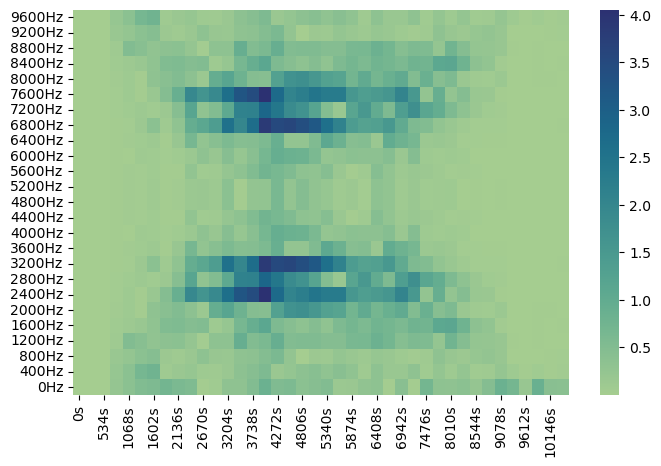

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(df, cmap="crest")

#### Alternativa

(10700,)
(32, 106)


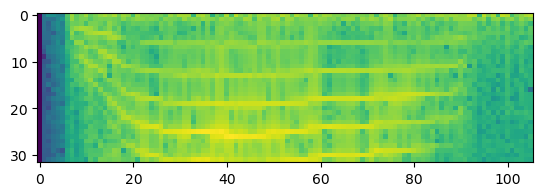

In [20]:
#### Forma 2

n_mels = 32
n_fft = 100
noverlap = 0#n_fft//2
segundos = 1
largo = segundos*fs
bloques = largo // n_fft

starts,spectrum = spectrogram.create_spectrogram(x,n_fft,n_mels,noverlap)
# spectrum = librosa.power_to_db(spectrum)
# spectrum = np.reshape(spectrum, spectrum.shape + (1,))

print(x.shape)
print(spectrum.T.shape)

# spectrum = librosa.power_to_db(spectrum)
plt.imshow(spectrum.T)
plt.show()


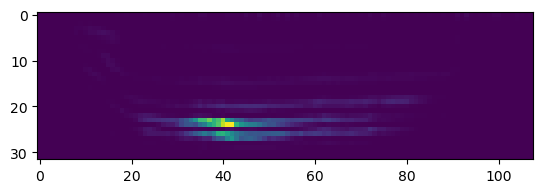

In [17]:
# Librosa version
spectrum = librosa.feature.melspectrogram(y=x, sr=fs, hop_length=n_fft, n_fft=n_fft, n_mels=n_mels)
spectrum.shape

# spectrum = librosa.power_to_db(spectrum)
plt.imshow(spectrum)
plt.show()

## Observaciones

#### La imagen del espectrograma en el tiempo siempre es dimensión NxN siendo N el número finito de puntos en la secuencia temporal. Este dato no es menor porque es un parámetro para calcular el tamaño final de la entrada de la capa. Una alternativa es realizar una ventana en el espectro, englobando asi un grupo de frecuencias

- $Tamaño = cantNiveles(N^{2})$
  - cantNiveles = conjunto de valores discretos de intensidad

**Ante audios de grandes anchos de banda necesitamos una frecuencia de muestreo más grande lo cual hace que hayan más puntos y tarde más el tiempo de ejecución. Una solución puede ser poner un filtro digital pasabajos para reducir el ancho de banda y construir el espectro con una fs mayor a ese ancho de banda (el cual es menor).**


**Otra opción es mejorar el tiempo de ejecución de los for anidados**

**O usar otra alternativa**

# Borradores

In [18]:
spectrum = np.zeros(shape=(windows_t,windows_f))

acc = 0
counter = 0
L = len(x)
for window in range(0,windows_t):

  for frecuency in range(0, windows_f):

    for armonic in range((frecuency)*len(x)//(windows_f + 1), (frecuency + 1)*len(x)//(windows_f + 1)):
      
      for instant in range((window)*len(x)//(windows_t + 1), (window + 1)*len(x)//(windows_t + 1)):
        # Usar alguna función que calcule la FFT más eficazmente
        # Probar con np.fft()
        # acc += x[instant]*(
        #                   cmath.e**(
        #                       (-1j*2*cmath.pi*instant*armonic)/L
        #                       )
        #                   ) #Hay que intentar reducir este calculo!!. Mientras más grande es fs más tarda!! D:
        counter += 1
                  
    spectrum[window][frecuency] = (acc / counter) 
    acc = 0
    counter = 0
  
print(x.shape, spectrum.shape)

(10700,) (40, 25)
